Task #1 - An exploratory data analysis (EDA) to uncover insights and summarize your findings.

In [20]:
# uncomment and install libraries if needed
# !pip install pandas numpy matplotlib seaborn

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def load_and_prepare_data(file_path):
    """Load dataset and preprocess it."""
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip', lineterminator='\n')
    df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')
    return df

In [23]:
def display_basic_info(df):
    """Display basic dataset information."""
    print("Dataset Overview:")
    print(f"Total Records: {len(df)}")
    print(f"Columns: {list(df.columns)}\n")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

In [24]:
def visualize_missing_values(df):
    """Visualize missing values percentage by column."""
    missing_values = df.isnull().mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Percentage of Missing Values by Column")
    plt.ylabel("Percentage")
    plt.xlabel("Columns")
    plt.tight_layout()
    plt.show()

In [25]:
def generate_statistics(df):
    """Generate summary statistics for numeric columns."""
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    print("\nSummary Statistics:")
    print(df[numeric_columns].describe())

In [26]:
def plot_metric_distributions(df):
    """Plot distributions of key metrics."""
    numeric_columns = ['likes_count', 'comments_count', 'views_count']
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True, bins=50, color="skyblue")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [27]:
def analyze_engagement_trends(df):
    """Analyze engagement trends over time."""
    if 'created_time' in df.columns:
        df['year_month'] = df['created_time'].dt.to_period('M')
        engagement_trend = df.groupby('year_month')[['likes_count', 'comments_count']].sum()
        engagement_trend.plot(figsize=(10, 5), title='Engagement Trends Over Time')
        plt.show()

In [28]:
def analyze_correlations(df):
    """Visualize correlations between numerical features."""
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [29]:
def extract_key_insights(df):
    """Extract key insights from the dataset."""
    insights = {
        'total_records': len(df),
        'unique_platforms': df['platform'].nunique() if 'platform' in df.columns else None,
        'total_likes': df['likes_count'].sum(),
        'total_comments': df['comments_count'].sum(),
        'total_views': df['views_count'].sum(),
        'avg_likes_per_post': df['likes_count'].mean(),
        'avg_comments_per_post': df['comments_count'].mean(),
        'avg_views_per_post': df['views_count'].mean(),
        'most_common_platform': df['platform'].mode()[0] if 'platform' in df.columns else None,
        'max_engagement_post_platform': df.loc[df['likes_count'].idxmax(), 'platform'] if 'platform' in df.columns else None
    }
    print("\nKey Insights:")
    for key, value in insights.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
    return insights

Dataset Overview:
Total Records: 10000
Columns: ['platform', 'account_id', 'id', 'created_time', 'text_original', 'text_additional', 'likes_count', 'shares_count', 'comments_count', 'views_count']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   platform         10000 non-null  object             
 1   account_id       10000 non-null  object             
 2   id               10000 non-null  object             
 3   created_time     10000 non-null  datetime64[ns, UTC]
 4   text_original    7613 non-null   object             
 5   text_additional  3 non-null      object             
 6   likes_count      9998 non-null   float64            
 7   shares_count     5000 non-null   float64            
 8   comments_count   9955 non-null   float64            
 9   views_count      5621 non-null   float64           

C:\Users\bezkr\AppData\Local\Temp\ipykernel_3212\338983533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


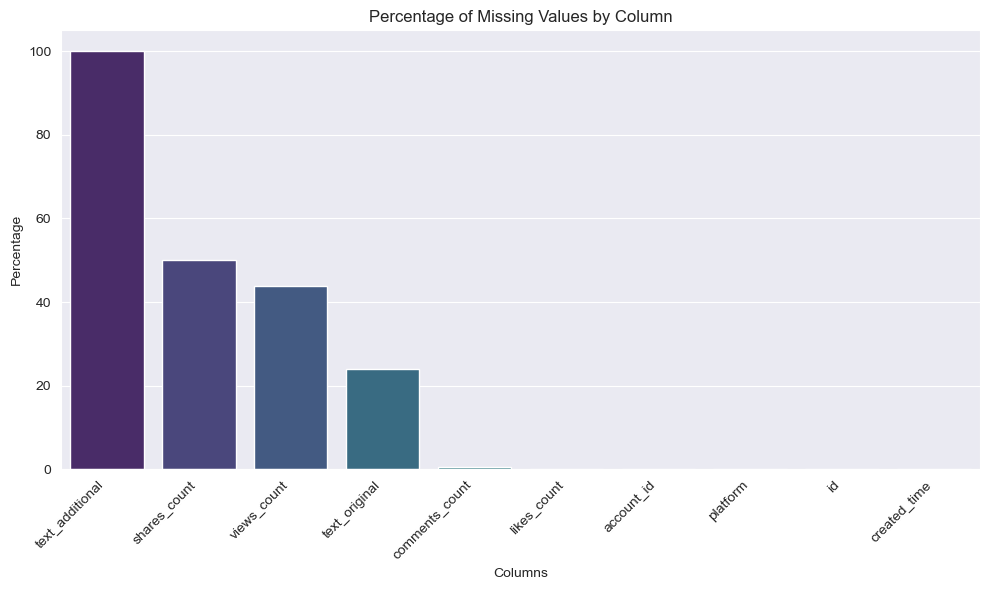


Summary Statistics:
         likes_count  shares_count  comments_count   views_count
count    9998.000000   5000.000000     9955.000000  5.621000e+03
mean     1416.641928     79.232000      299.793872  1.797353e+04
std      5981.971791    979.564848     1257.022415  1.012492e+05
min         0.000000      0.000000        0.000000  3.000000e+00
25%       116.250000      3.000000       28.000000  1.539000e+03
50%       356.000000      9.000000       93.000000  3.704000e+03
75%       895.750000     43.000000      261.000000  8.535000e+03
max    188611.000000  47500.000000    80415.000000  3.500000e+06


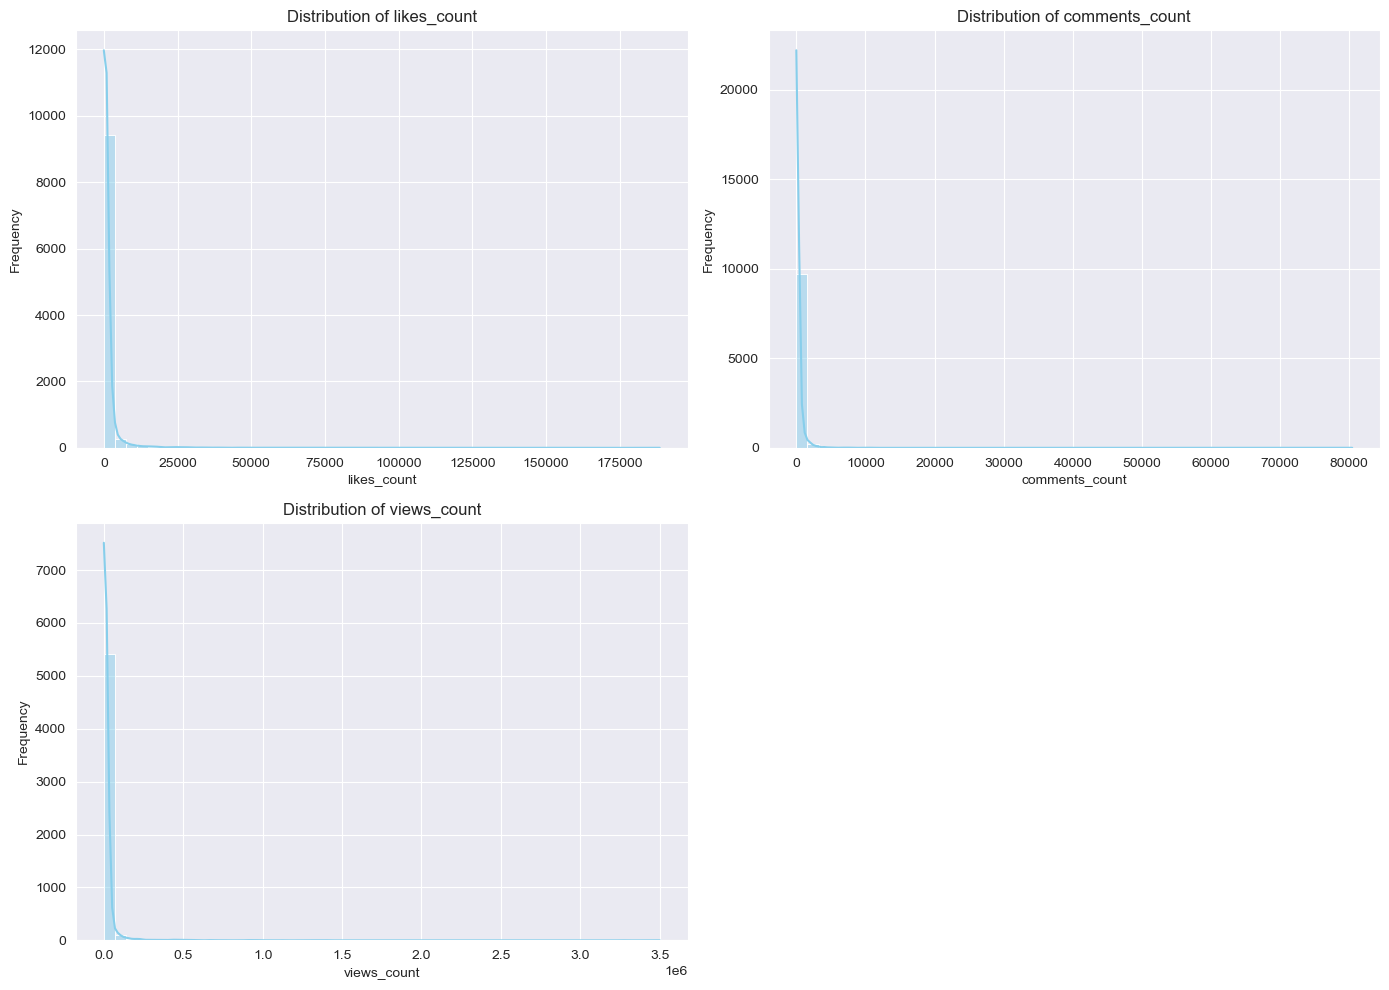

C:\Users\bezkr\AppData\Local\Temp\ipykernel_3212\496785496.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['created_time'].dt.to_period('M')


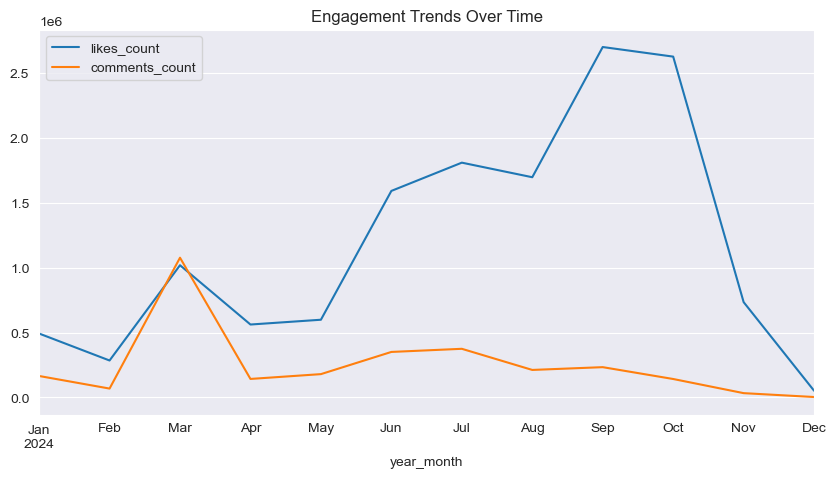

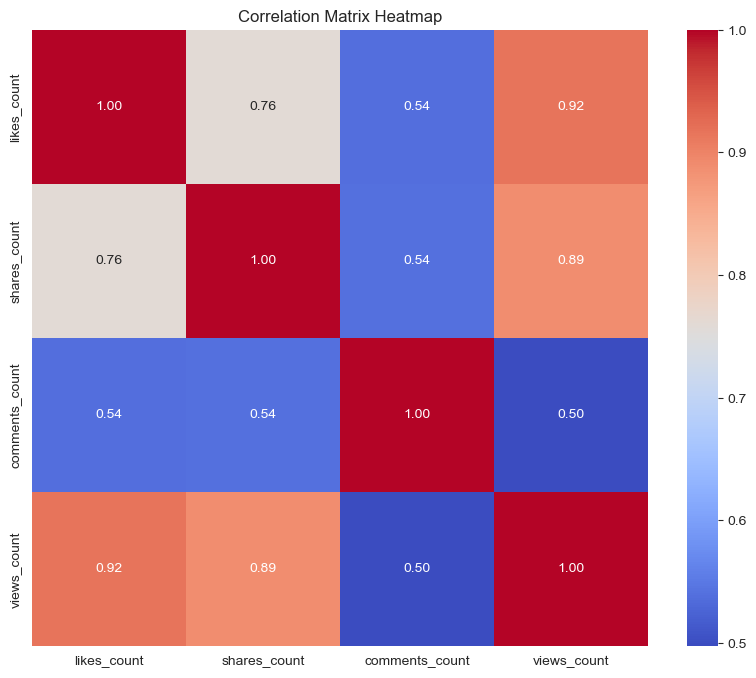


Key Insights:
Total Records: 10000
Unique Platforms: 4
Total Likes: 14163586.0
Total Comments: 2984448.0
Total Views: 101029206.0
Avg Likes Per Post: 1416.6419283856771
Avg Comments Per Post: 299.7938724259166
Avg Views Per Post: 17973.52890944672
Most Common Platform: Facebook
Max Engagement Post Platform: YouTube


In [30]:
def main():
    file_path = 'test_sample.csv'
    df = load_and_prepare_data(file_path)
    display_basic_info(df)
    visualize_missing_values(df)
    generate_statistics(df)
    plot_metric_distributions(df)
    analyze_engagement_trends(df)
    analyze_correlations(df)
    extract_key_insights(df)

if __name__ == "__main__":
    main()